[*********************100%***********************]  1 of 1 completed
Epoch 1/100
18/18 [==============================] - 4s 23ms/step - loss: 0.1137
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0072
Epoch 3/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0034
Epoch 4/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0024
Epoch 5/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0020
Epoch 6/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0017
Epoch 7/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0015
Epoch 8/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0015
Epoch 9/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0014
Epoch 10/100
18/18 [==============================] - 0s 24ms/step - loss: 0.0014
Epoch 11/100
18/18 [==============================] - 0s 23ms/step - loss: 0.0014
Epoch 12/100
18/18 [==================

18/18 [==============================] - 0s 24ms/step - loss: 7.0268e-04
Epoch 98/100
18/18 [==============================] - 0s 24ms/step - loss: 7.3826e-04
Epoch 99/100
18/18 [==============================] - 0s 27ms/step - loss: 7.2483e-04
Epoch 100/100
5/5 [==============================] - 1s 10ms/step


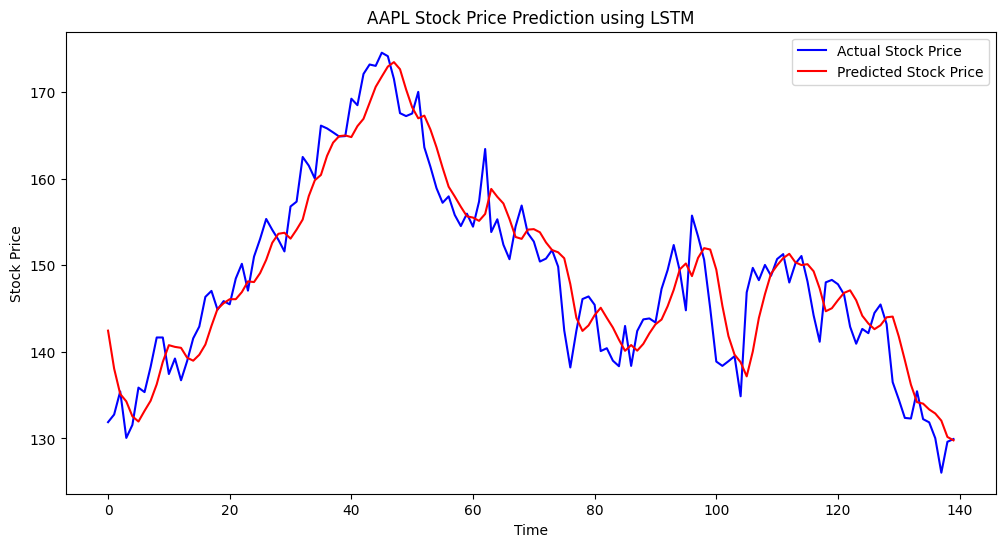

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to fetch stock price data using Yahoo Finance API
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Load historical stock price data for Apple Inc. (AAPL) from Yahoo Finance
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"
data = fetch_stock_data(ticker, start_date, end_date)

# Extract the "Close" price as the target variable
stock_prices = data["Close"].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices)

# Create the dataset with a time window for LSTM
def create_dataset(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Set the time window (number of previous days' prices to consider)
look_back = 60

# Create the dataset
X, y = create_dataset(stock_prices_scaled, look_back)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse scale the predictions and actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Stock Price", color="blue")
plt.plot(y_pred_actual, label="Predicted Stock Price", color="red")
plt.title(f"{ticker} Stock Price Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
